In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
import folium
import time
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_excel('RAC.xlsx')
df_Ubicacion= pd.read_excel('Ubicacion.xlsx')

In [100]:
df.head()

Servicio  Sexo  Mes  edad  anio        RAC  paciente_id
0  CESFAM LAS AMERICAS     0  Ene    51  2019  28.571429            1
1  CESFAM LAS AMERICAS     0  Ene    63  2019   4.314808            2
2    CESFAM LA FLORIDA     1  Ene    80  2019   3.878976            3
3    CESFAM LA FLORIDA     0  Ene    86  2019  14.877263            4
4  CESFAM CARLOS TRUPP     1  Ene    66  2019   4.469274            5

In [102]:
import plotly.graph_objects as go

# Filtrar las columnas necesarias
df_filtrado = df[['anio', 'RAC']]

# Agrupar por año y calcular la suma de la cantidad
df_suma = df_filtrado.groupby('anio')['RAC'].sum()

# Crear la figura del gráfico
fig = go.Figure()

# Agregar una línea al gráfico
fig.add_trace(go.Scatter(
    x=df_suma.index,
    y=df_suma,
    mode='lines',
    name='Suma de la Cantidad'
))

# Establecer el título del gráfico y los nombres de los ejes
fig.update_layout(
    title='Resultados vs Años',
    xaxis_title='Año',
    yaxis_title=' Numero de Examenes'
)

# Mostrar el gráfico
fig.show()



In [103]:
# revisar si hay valores nulos
df.isnull().sum()


Servicio       0
Sexo           0
Mes            0
edad           0
anio           0
RAC            0
paciente_id    0
dtype: int64

In [104]:
# variable sexo a numerica
df['Sexo'] = df['Sexo'].replace(['Mujer','Hombre'],[0,1])

In [105]:
fig = px.imshow(df.corr())
fig.show()

In [106]:
# Servicio	Sexo	Mes	edad	anio	RAC
fig = px.scatter_matrix(df, dimensions=['edad', 'RAC', 'anio'])
fig.show()

In [107]:
# Servicio	Sexo	Mes	edad	anio	RAC
fig = px.scatter(df, x="edad", y="RAC", title='Relacion P/C vs Edad', size_max=100)
fig.add_hline(y=20, line_dash="dash", line_color="green")
fig.show()

In [108]:
# ahora vamos a unir el dataframe RAC1 con el dataframe df_Ubicacion
df_RAC1_Ubicacion = pd.merge(df, df_Ubicacion, on='Servicio', how='left')
df_RAC1_Ubicacion.head()
# Separar dos valores que estan en una misma columna en dos columnas diferentes
df_RAC1_Ubicacion[['Latitud','Longitud']] = df_RAC1_Ubicacion['Coordenadas'].str.split(",",expand=True)
# convertir las variables a numericas
df_RAC1_Ubicacion['Latitud'] = pd.to_numeric(df_RAC1_Ubicacion['Latitud'])
df_RAC1_Ubicacion['Longitud'] = pd.to_numeric(df_RAC1_Ubicacion['Longitud'])
# elimar los datos nulos
df_RAC1_Ubicacion.dropna(inplace=True)
# Crear un mapa geografico con los datos de la variable Latitud y Longitud
# Crear el mapa
m = folium.Map(location=[-35.44, -71.63], zoom_start=13)
# Crear el mapa de calor
HeatMap(data=df_RAC1_Ubicacion[['Latitud', 'Longitud', 'RAC']].groupby(['Latitud', 'Longitud']).sum().reset_index().values.tolist(), radius=30, max_zoom=13).add_to(m)
# Mostrar el mapa
m

In [109]:
# agregar una columna paciente_id para poder codificar la indentidad de los pacientes
df['paciente_id'] = df.index + 1
# Guardar el archivo en formato csv
df.to_csv('RAC.csv', index=False)

Generando interconsulta para el paciente 14 con categoría alto. Requiere atención de especialidades.
Haciendo seguimiento al paciente 14
Generando interconsulta para el paciente 18 con categoría medio-alto. Requiere atención primaria.
Haciendo seguimiento al paciente 18
Generando interconsulta para el paciente 26 con categoría medio-alto. Requiere atención primaria.
Haciendo seguimiento al paciente 26
Generando interconsulta para el paciente 32 con categoría medio-alto. Requiere atención primaria.
Haciendo seguimiento al paciente 32
Generando interconsulta para el paciente 44 con categoría medio-alto. Requiere atención primaria.
Haciendo seguimiento al paciente 44
Generando interconsulta para el paciente 58 con categoría medio-alto. Requiere atención primaria.
Haciendo seguimiento al paciente 58
Generando interconsulta para el paciente 59 con categoría alto. Requiere atención de especialidades.
Haciendo seguimiento al paciente 59
Generando interconsulta para el paciente 73 con categorí

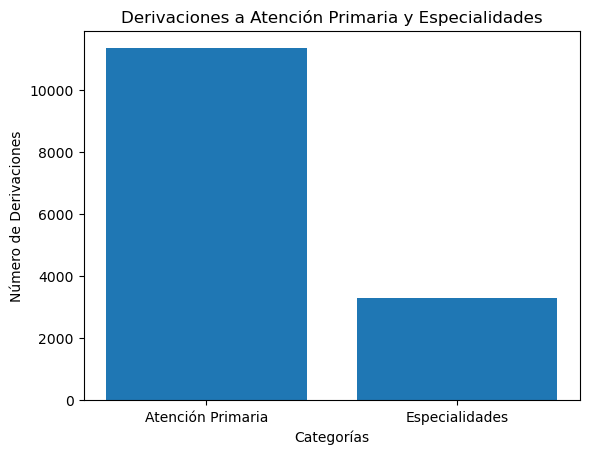

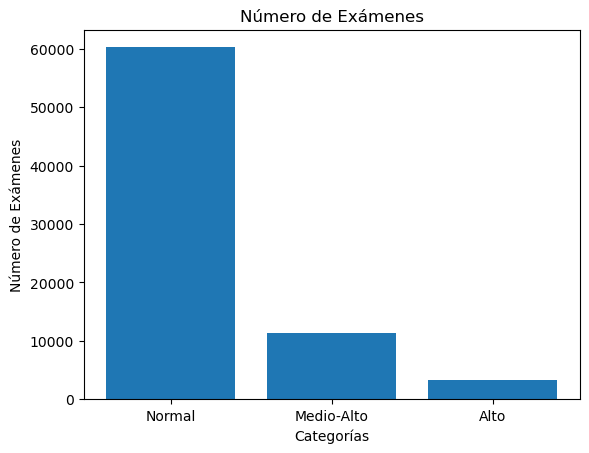

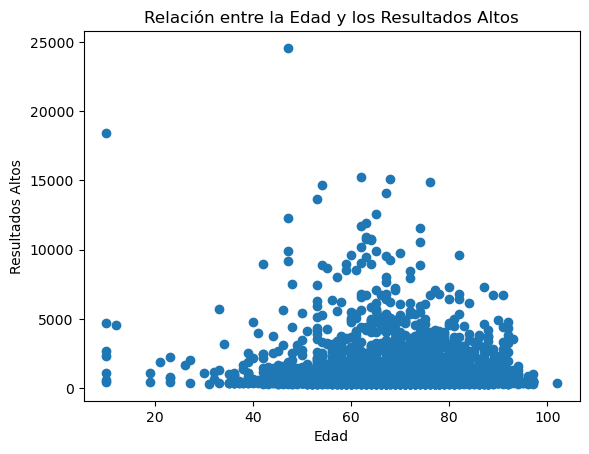

Generando interconsulta para el paciente 14 con categoría alto. Requiere atención de especialidades.
Haciendo seguimiento al paciente 14
Generando interconsulta para el paciente 18 con categoría medio-alto. Requiere atención primaria.
Haciendo seguimiento al paciente 18
Generando interconsulta para el paciente 26 con categoría medio-alto. Requiere atención primaria.
Haciendo seguimiento al paciente 26
Generando interconsulta para el paciente 32 con categoría medio-alto. Requiere atención primaria.
Haciendo seguimiento al paciente 32
Generando interconsulta para el paciente 44 con categoría medio-alto. Requiere atención primaria.
Haciendo seguimiento al paciente 44
Generando interconsulta para el paciente 58 con categoría medio-alto. Requiere atención primaria.
Haciendo seguimiento al paciente 58
Generando interconsulta para el paciente 59 con categoría alto. Requiere atención de especialidades.
Haciendo seguimiento al paciente 59
Generando interconsulta para el paciente 73 con categorí

KeyboardInterrupt: 

In [128]:
import pandas as pd
import time
import matplotlib.pyplot as plt

class AgenteBusqueda:
    def __init__(self, archivo_excel):
        self.base_de_datos = pd.read_csv(archivo_excel)
        self.derivaciones_primaria = 0
        self.derivaciones_especialidades = 0
        self.examen_normal = 0
        self.examen_medio_alto = 0
        self.examen_alto = 0
        self.resultados_altos = pd.DataFrame()

    def ExtraerDatos(self):
        return self.base_de_datos
    
    def SistemaFuzzy(self, RAC):
        if RAC <= 30:
            self.examen_normal += 1
            return "normal"
        elif 30 < RAC <= 300:
            self.examen_medio_alto += 1
            return "medio-alto"
        else:
            self.examen_alto += 1
            return "alto"
    
    def GenerarInterconsulta(self, paciente_id, categoria):
        if categoria == "medio-alto":
            print(f"Generando interconsulta para el paciente {paciente_id} con categoría {categoria}. Requiere atención primaria.")
            self.derivaciones_primaria += 1
            
        elif categoria == "alto":
            print(f"Generando interconsulta para el paciente {paciente_id} con categoría {categoria}. Requiere atención de especialidades.")
            self.derivaciones_especialidades += 1
            
        else:
            print(f"El paciente {paciente_id} con categoría {categoria} no requiere interconsulta.")
    
    def HacerSeguimiento(self, paciente_id):
        print(f"Haciendo seguimiento al paciente {paciente_id}")
    
    def DetectarErroresAlteraciones(self, datos):
        errores_alteraciones = pd.DataFrame()
        for index, row in datos.iterrows():
            categoria = self.SistemaFuzzy(row['RAC'])
            if categoria in ["medio-alto", "alto"]:
                self.GenerarInterconsulta(row['paciente_id'], categoria)
                self.HacerSeguimiento(row['paciente_id'])
                errores_alteraciones = errores_alteraciones.append(row)
            if categoria == "alto":
                self.resultados_altos = self.resultados_altos.append(row)
        return errores_alteraciones
    
    def AnalizarTendencias(self, errores_alteraciones):
        tendencias = pd.DataFrame()
        if errores_alteraciones.empty:
            print("No hay exámenes alterados o con errores.")
        else:
            grupos = errores_alteraciones.groupby(['edad', 'RAC', 'Sexo'])
            for nombre, grupo in grupos:
                grupo_ordenado = grupo.sort_values(by='anio')
                print(f"El grupo {nombre} ha tenido {len(grupo_ordenado)} exámenes alterados o con errores.")
    
    def MonitorearBaseDatos(self):
        while True: # Ciclo infinito
            time.sleep(3)  # Dormir
            datos = self.ExtraerDatos()
            errores_alteraciones = self.DetectarErroresAlteraciones(datos)
            if not errores_alteraciones.empty:
                self.AnalizarTendencias(errores_alteraciones)
            else:
                print("No se encontraron exámenes alterados o errores en esta iteración.")
            self.GraficarDerivaciones()
            self.GraficarExamenes()
            self.GraficarScatterEdadResultadosAltos()
    
    def GraficarDerivaciones(self):
        categorias = ['Atención Primaria', 'Especialidades']
        valores = [self.derivaciones_primaria, self.derivaciones_especialidades]
        plt.bar(categorias, valores)
        plt.title('Derivaciones a Atención Primaria y Especialidades')
        plt.xlabel('Categorías')
        plt.ylabel('Número de Derivaciones')
        plt.show()

    def GraficarExamenes(self):
        categorias = ['Normal', 'Medio-Alto', 'Alto']
        valores = [self.examen_normal, self.examen_medio_alto, self.examen_alto]
        plt.bar(categorias, valores)
        plt.title('Número de Exámenes')
        plt.xlabel('Categorías')
        plt.ylabel('Número de Exámenes')
        plt.show()

    def GraficarScatterEdadResultadosAltos(self):
        plt.scatter(self.resultados_altos['edad'], self.resultados_altos['RAC'])
        plt.title('Relación entre la Edad y los Resultados Altos')
        plt.xlabel('Edad')
        plt.ylabel('Resultados Altos')
        plt.show()

# Ejemplo de uso
agente = AgenteBusqueda('RAC.csv')
agente.MonitorearBaseDatos()
